Day 1:

- Overview of Machine Learning (Lecture)
- Simple Regression dataset - step through ML workflow (Workshop)

## Workflow

1. Data engineering
2. Feature engineering
3. Shuffle, split train/test
4. Select, configure, fit model
5. Predict
6. Evaluate

Dataset
- https://archive.ics.uci.edu/ml/datasets/auto+mpg
- Multivariate = more than 1 FEATURE / attribute / input
- Instances: 398 (very small)
- Attribute Characteristics:
    Categorical: fixed number of values [0, 1], [0, 1, 2], [2, 3, 4]
    Real: real number
- Number of Attributes: 8
- Missing Values? Yes (may need to dropna, or interpolate)


Problem Formulation:
- Given data about a car
- Predict its miles per gallon (a real number )  => Regression Problem
- Metric: How accurate is the prediction from the ground truth

Actual metric: Mean Squared Error

$$\text{MSE}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (y_i - \hat{y}_i)^2.$$

In [0]:
import pandas as pd

In [4]:
!curl -o auto-mpg.data https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 30286  100 30286    0     0  81633      0 --:--:-- --:--:-- --:--:-- 81633


In [5]:
df = pd.read_csv('auto-mpg.data', sep='\s+',
                names=['mpg', 'cylinders', 'displacement',
                       'horsepower', 'weight', 'acceleration', 'model_year',
                       'origin', 'car_name'],
                header=None,
                na_values=['?'])

# Attribute Information:
#    1. mpg:           continuous
#    2. cylinders:     multi-valued discrete
#    3. displacement:  continuous
#    4. horsepower:    continuous
#    5. weight:        continuous
#    6. acceleration:  continuous
#    7. model year:    multi-valued discrete
#    8. origin:        multi-valued discrete
#    9. car name:      string (mostly unique for each instance)

# axis=1 drop columns
# axis=0 [default] drop rows
# inplace=True changes original df
# inplace=False returns a copy of the df
df.drop(['car_name'], axis=1, inplace=True)

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null float64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [6]:
# One way to print na rows
df[df.isna().values]

# df.isna().values returns a mask
# apply mask to original dataframe

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
32,25.0,4,98.0,NaN,2046.0,19.0,71,1
126,21.0,6,200.0,NaN,2875.0,17.0,74,1
330,40.9,4,85.0,NaN,1835.0,17.3,80,2
336,23.6,4,140.0,NaN,2905.0,14.3,80,1
354,34.5,4,100.0,NaN,2320.0,15.8,81,2
374,23.0,4,151.0,NaN,3035.0,20.5,82,1


In [0]:
# NaN values

# - drop  =>  dropna()
# - interpolate => interpolate()
# - fill with same value (mean, median, ...) => fillna()

In [9]:
index = df[df.isna().values].index

# original
df.iloc[index] # iloc integer column, else use loc 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
32,25.0,4,98.0,NaN,2046.0,19.0,71,1
126,21.0,6,200.0,NaN,2875.0,17.0,74,1
330,40.9,4,85.0,NaN,1835.0,17.3,80,2
336,23.6,4,140.0,NaN,2905.0,14.3,80,1
354,34.5,4,100.0,NaN,2320.0,15.8,81,2
374,23.0,4,151.0,NaN,3035.0,20.5,82,1


In [11]:
df1 = df.dropna()

# KeyError: "None of [Int64Index([32, 126, 330, 336, 354, 374], dtype='int64')] are in the [index]"
# df1.loc[index] # rows are gone!!!

KeyError: ignored

In [12]:
df2 = df.interpolate()
df2.iloc[index] # linear interpolation

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
32,25.0,4,98.0,97.5,2046.0,19.0,71,1
126,21.0,6,200.0,97.5,2875.0,17.0,74,1
330,40.9,4,85.0,67.0,1835.0,17.3,80,2
336,23.6,4,140.0,80.0,2905.0,14.3,80,1
354,34.5,4,100.0,74.5,2320.0,15.8,81,2
374,23.0,4,151.0,83.0,3035.0,20.5,82,1


In [13]:
df2.iloc[30:35] # see the interpolation

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
30,28.0,4,140.0,90.0,2264.0,15.5,71,1
31,25.0,4,113.0,95.0,2228.0,14.0,71,3
32,25.0,4,98.0,97.5,2046.0,19.0,71,1
33,19.0,6,232.0,100.0,2634.0,13.0,71,1
34,16.0,6,225.0,105.0,3439.0,15.5,71,1


In [14]:
import numpy as np
df3 = df.fillna(np.mean(df.horsepower))
df3.iloc[index]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
32,25.0,4,98.0,104.469388,2046.0,19.0,71,1
126,21.0,6,200.0,104.469388,2875.0,17.0,74,1
330,40.9,4,85.0,104.469388,1835.0,17.3,80,2
336,23.6,4,140.0,104.469388,2905.0,14.3,80,1
354,34.5,4,100.0,104.469388,2320.0,15.8,81,2
374,23.0,4,151.0,104.469388,3035.0,20.5,82,1


In [15]:
# Drop NaN values because horsepower interpolation between different
# car models requires work (future enhancement)

df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null float64
acceleration    392 non-null float64
model_year      392 non-null int64
origin          392 non-null int64
dtypes: float64(5), int64(3)
memory usage: 27.6 KB


In [0]:
df.corr?

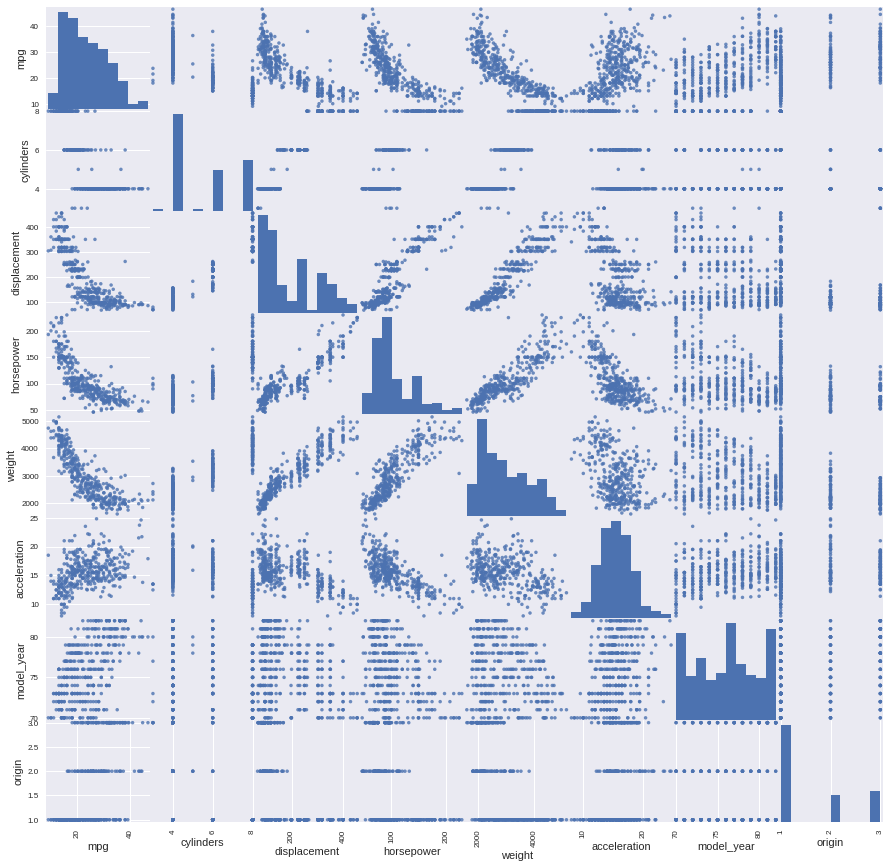

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
model_year    0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              acceleration  model_year    origin  
mpg               0.423329    0.580541  0.565209  
cylinders        -0.504683   -0.345647 -0.568932  
displacement     -0.543800   -0.369855 -0.614535  
horsepower       -0.689196   -0.416361 -0.455171  
weight           -0.416839   -0.309120 -0.585005  
acceleration      1.000000    0.2903

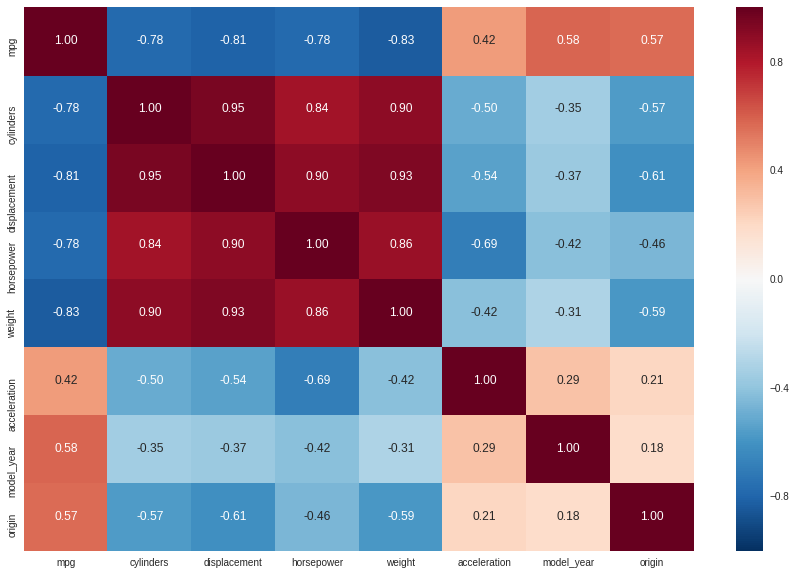

In [16]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

scatter_matrix(df, alpha=0.8, figsize=(15, 15))
plt.show()

# show correlations
print(df.corr())

# another way to plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
sns.heatmap(df.corr(), ax=axes, annot=True, fmt='.2f')

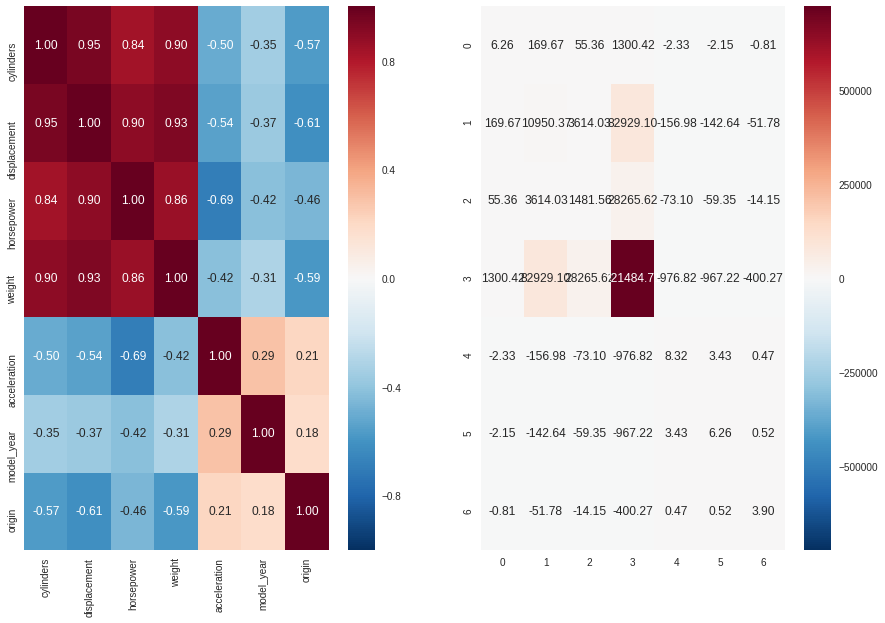

In [18]:
# feature engineering => reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

X = df.loc[:, df.columns != 'mpg']
Z = pca.fit_transform(X)

#pca.components_ # eigenvectors, sorted by top 3 eigenvalues

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
sns.heatmap(X.corr(), ax=axes[0], annot=True, fmt='.2f')
sns.heatmap(pca.get_covariance(), ax=axes[1], annot=True, fmt='.2f')

In [19]:
print(pca.explained_variance_ratio_)

[9.97561506e-01 2.06279691e-03 3.55947852e-04]


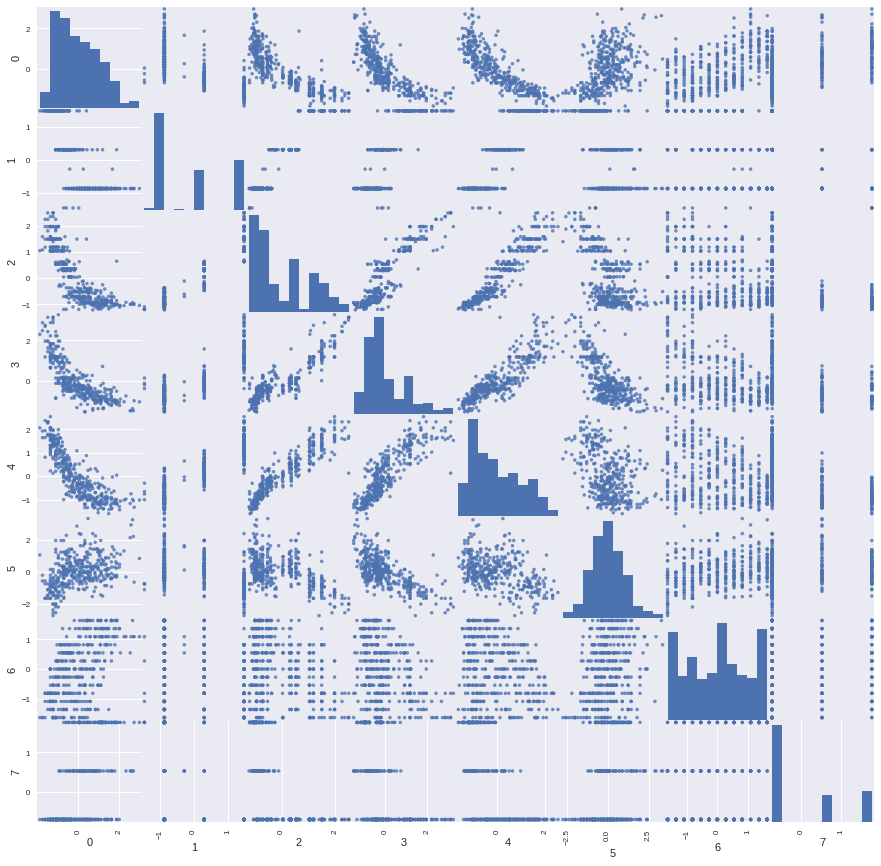

In [20]:
# Normalize (scale the features to similar ranges)
# replot scatter matrix to see any changes

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
df_scaled = pd.DataFrame(scaler.transform(df))

scatter_matrix(df_scaled, alpha=.8, figsize=(15, 15))
plt.show()

# print(scaler.mean_) # mean per feature
# print(scaler.scale_) # std dev per feature

In [21]:
# Encode model_year(?)
# Don't actually encode if we want to predict later than 1982

# inspect unique values
print(df.model_year.unique())

# inspect min, max
print(df.model_year.describe())

[70 71 72 73 74 75 76 77 78 79 80 81 82]
count    392.000000
mean      75.979592
std        3.683737
min       70.000000
25%       73.000000
50%       76.000000
75%       79.000000
max       82.000000
Name: model_year, dtype: float64


In [22]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
le.fit(df.model_year)
df['model_year_enc'] = le.transform(df.model_year) # add to dataframe

oe = OneHotEncoder()

# Expected 2D array, got 1D array instead
# df.model_year.values = [70, 70, ....]
# df.model_year.values.reshape(-1, 1) = [[70], [70], ...]
oe.fit(df.model_year.values.reshape(-1, 1))

# can't just assign to 1 column because this is a matrix
model_year_onehot = oe.transform(df.model_year.values.reshape(-1, 1))
model_year_onehot.todense()

matrix([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.]])

In [23]:
df.loc[:, ['model_year', 'model_year_enc']] # compare label encoded

,model_year,model_year_enc
0,70,0
1,70,0
2,70,0
3,70,0
4,70,0
5,70,0
6,70,0
7,70,0
8,70,0
9,70,0


In [24]:
# create a dataframe around the one-hot encoded columns
# share the same index as original dataframe
pd.DataFrame(model_year_onehot.todense(), index=df.index)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# share the same index as original dataframe
df_onehot = pd.DataFrame(model_year_onehot.todense(), index=df.index)

df2 = pd.concat([df, df_onehot], axis=1) # axis=1 concat columns
                                         # axis=0 concat rows
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 22 columns):
mpg               392 non-null float64
cylinders         392 non-null int64
displacement      392 non-null float64
horsepower        392 non-null float64
weight            392 non-null float64
acceleration      392 non-null float64
model_year        392 non-null int64
origin            392 non-null int64
model_year_enc    392 non-null int64
0                 392 non-null float64
1                 392 non-null float64
2                 392 non-null float64
3                 392 non-null float64
4                 392 non-null float64
5                 392 non-null float64
6                 392 non-null float64
7                 392 non-null float64
8                 392 non-null float64
9                 392 non-null float64
10                392 non-null float64
11                392 non-null float64
12                392 non-null float64
dtypes: float64(18), int64(4)
memory usage: 7

In [26]:
# one-line to do one-hot (also saves memories)

df3 = pd.concat([df, pd.get_dummies(df.model_year)], axis=1)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 22 columns):
mpg               392 non-null float64
cylinders         392 non-null int64
displacement      392 non-null float64
horsepower        392 non-null float64
weight            392 non-null float64
acceleration      392 non-null float64
model_year        392 non-null int64
origin            392 non-null int64
model_year_enc    392 non-null int64
70                392 non-null uint8
71                392 non-null uint8
72                392 non-null uint8
73                392 non-null uint8
74                392 non-null uint8
75                392 non-null uint8
76                392 non-null uint8
77                392 non-null uint8
78                392 non-null uint8
79                392 non-null uint8
80                392 non-null uint8
81                392 non-null uint8
82                392 non-null uint8
dtypes: float64(5), int64(4), uint8(13)
memory usage: 35.6 KB


In [27]:
# Exercise
# 1. Run LabelEncode example on df.model_year
# 2. Print the classes, transform, inverse_transform
# 3. Post on slack
le = LabelEncoder()
transformed = le.fit_transform(df.model_year)
print(transformed)

# reverse
reverse = le.inverse_transform(transformed)
print(reverse)

# override
# df.model_year = transformed

# append as new column
df['model_year_enc'] = transformed
df

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7
  7  7  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,model_year_enc
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,0
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,0
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,0
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,0
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,0


In [28]:
# feature selection

# select cylinders to model_year
# loc[row_selector, col_selector]
X = df.loc[:, 'cylinders':'model_year'] # contiguous columns
y = df.mpg

X.columns # verify columns are correct

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year'],
      dtype='object')

In [29]:
# Example: non-contiguous columns (skip something in middle)
# skip mpg, weight, origin, model_year_enc
df.loc[:, (df.columns != 'mpg') & (df.columns != 'weight') &
          (df.columns != 'origin') & (df.columns != 'model_year_enc')]

,cylinders,displacement,horsepower,acceleration,model_year
0,8,307.0,130.0,12.0,70
1,8,350.0,165.0,11.5,70
2,8,318.0,150.0,11.0,70
3,8,304.0,150.0,12.0,70
4,8,302.0,140.0,10.5,70
5,8,429.0,198.0,10.0,70
6,8,454.0,220.0,9.0,70
7,8,440.0,215.0,8.5,70
8,8,455.0,225.0,10.0,70
9,8,390.0,190.0,8.5,70


In [0]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'model_year_enc'],
      dtype='object')

In [0]:
# Train/test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) # split 75/25

In [31]:
print(X_train[:5])

     cylinders  displacement  horsepower  weight  acceleration  model_year
267          4         134.0        95.0  2560.0          14.2          78
16           6         199.0        97.0  2774.0          15.5          70
67           8         429.0       208.0  4633.0          11.0          72
160          6         231.0       110.0  3907.0          21.0          75
7            8         440.0       215.0  4312.0           8.5          70


In [32]:
print(X_test.shape)

(98, 6)


In [33]:
# Scale X_train, X_test, y_train, y_test
from sklearn.preprocessing import StandardScaler

# Scaling both so that Mean Squared Error / Cost computes small numbers
# (better for training)
X_scaler = StandardScaler()
y_scaler = StandardScaler()

# initialise and transform y_train
# reshape vector: from (294,) to (294, 1)
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))

# Exercise:
# 1. Scale X (X_train, X_test)
# 2. Retrain SGD with X_train_scaled, y_train_scaled
# 3. post results (code + training results) on Slack
X_train_scaled = X_scaler.fit_transform(X_train) # (294, 6) ok (matrix)
X_test_scaled = X_scaler.transform(X_test)
print(y_train_scaled)

[[ 4.76114146e-01]
 [-7.11725791e-01]
 [-1.58697627e+00]
 [-8.36761573e-01]
 [-1.21186892e+00]
 [ 2.88560471e-01]
 [ 1.31385389e+00]
 [ 1.33886105e+00]
 [ 1.42638609e+00]
 [-4.61654225e-01]
 [-2.11582660e-01]
 [-6.86718634e-01]
 [ 1.03877517e+00]
 [ 1.02627159e+00]
 [-3.36618442e-01]
 [-2.11582660e-01]
 [ 1.68896124e+00]
 [ 1.15130737e+00]
 [-5.36675695e-01]
 [-1.08683314e+00]
 [-2.11582660e-01]
 [-3.36618442e-01]
 [ 1.66395408e+00]
 [-3.36618442e-01]
 [-1.08683314e+00]
 [ 9.13739385e-01]
 [-8.65468768e-02]
 [ 1.01006797e-01]
 [ 6.63667820e-01]
 [ 8.51221494e-01]
 [-1.08683314e+00]
 [ 1.37637178e+00]
 [ 4.13596254e-01]
 [ 5.38632037e-01]
 [-5.86690008e-01]
 [ 2.22661510e+00]
 [-7.74243682e-01]
 [ 6.63667820e-01]
 [ 2.88560471e-01]
 [ 1.01376801e+00]
 [-7.11725791e-01]
 [-8.99279465e-01]
 [-1.33690470e+00]
 [-5.86690008e-01]
 [ 7.88703603e-01]
 [-4.61654225e-01]
 [-5.86690008e-01]
 [ 4.13596254e-01]
 [-8.65468768e-02]
 [-1.21186892e+00]
 [-3.86632755e-01]
 [ 5.26128459e-01]
 [-1.0868331

In [36]:
from sklearn.linear_model import SGDRegressor

# Stochastic Gradient Descent Regressor
model = SGDRegressor(random_state=42, verbose=True, tol=1e-4, max_iter=100,
                     eta0=0.001, learning_rate='invscaling')
    
model.fit(X_train_scaled, y_train_scaled.ravel()) # fit / train
model.score(X_test_scaled, y_test_scaled.ravel()) # evaluate with test set

-- Epoch 1
Norm: 0.13, NNZs: 6, Bias: 0.000436, T: 294, Avg. loss: 0.377156
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.20, NNZs: 6, Bias: 0.000457, T: 588, Avg. loss: 0.261912
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.25, NNZs: 6, Bias: 0.000441, T: 882, Avg. loss: 0.208425
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.28, NNZs: 6, Bias: 0.000358, T: 1176, Avg. loss: 0.178347
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.31, NNZs: 6, Bias: 0.000309, T: 1470, Avg. loss: 0.160037
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.33, NNZs: 6, Bias: 0.000315, T: 1764, Avg. loss: 0.148166
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.35, NNZs: 6, Bias: 0.000302, T: 2058, Avg. loss: 0.140144
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 0.36, NNZs: 6, Bias: 0.000292, T: 2352, Avg. loss: 0.134497
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 0.37, NNZs: 6, Bias: 0.000317, T: 2646, Avg. loss: 0.130428
Total training time: 0.01 seco

0.7656041128533674

In [35]:
print(model.score(X_test_scaled, y_test_scaled))
print(model.coef_)
print(model.intercept_)

0.7656041128533674
[-0.15662631 -0.17951804 -0.15688294 -0.27835492 -0.02660288  0.27474635]
[9.32699807e-05]


In [0]:
learning_curve?

In [37]:
from sklearn.model_selection import learning_curve

train_sizes_abs, train_scores, val_scores = learning_curve(
    SGDRegressor(random_state=42, verbose=True, tol=1e-4, max_iter=100,
                 learning_rate='constant', eta0=1e-4), # default is 0.01
    X_train_scaled, y_train_scaled.ravel(),
    cv=10,
    random_state=42,
    verbose=True)

[learning_curve] Training set sizes: [ 26  85 145 204 264]
-- Epoch 1
Norm: 0.00, NNZs: 6, Bias: -0.000206, T: 26, Avg. loss: 0.422346
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 6, Bias: -0.000412, T: 52, Avg. loss: 0.416554
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 6, Bias: -0.000619, T: 78, Avg. loss: 0.410889
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.02, NNZs: 6, Bias: -0.000824, T: 104, Avg. loss: 0.405344
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.02, NNZs: 6, Bias: -0.001032, T: 130, Avg. loss: 0.399921
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.02, NNZs: 6, Bias: -0.001239, T: 156, Avg. loss: 0.394611
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.03, NNZs: 6, Bias: -0.001448, T: 182, Avg. loss: 0.389415
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 0.03, NNZs: 6, Bias: -0.001656, T: 208, Avg. loss: 0.384329
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 0.03, NNZs: 6, Bias: -0.001865,

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)



Total training time: 0.01 seconds.
-- Epoch 36
Norm: 0.40, NNZs: 6, Bias: -0.006536, T: 7344, Avg. loss: 0.124696
Total training time: 0.01 seconds.
-- Epoch 37
Norm: 0.41, NNZs: 6, Bias: -0.006316, T: 7548, Avg. loss: 0.124370
Total training time: 0.01 seconds.
-- Epoch 38
Norm: 0.41, NNZs: 6, Bias: -0.006103, T: 7752, Avg. loss: 0.124063
Total training time: 0.01 seconds.
-- Epoch 39
Norm: 0.41, NNZs: 6, Bias: -0.005880, T: 7956, Avg. loss: 0.123775
Total training time: 0.01 seconds.
-- Epoch 40
Norm: 0.41, NNZs: 6, Bias: -0.005658, T: 8160, Avg. loss: 0.123497
Total training time: 0.01 seconds.
-- Epoch 41
Norm: 0.41, NNZs: 6, Bias: -0.005446, T: 8364, Avg. loss: 0.123239
Total training time: 0.01 seconds.
-- Epoch 42
Norm: 0.41, NNZs: 6, Bias: -0.005231, T: 8568, Avg. loss: 0.122994
Total training time: 0.01 seconds.
-- Epoch 43
Norm: 0.42, NNZs: 6, Bias: -0.005012, T: 8772, Avg. loss: 0.122756
Total training time: 0.02 seconds.
-- Epoch 44
Norm: 0.42, NNZs: 6, Bias: -0.004801, T:

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_mo

Total training time: 0.01 seconds.
-- Epoch 38
Norm: 0.44, NNZs: 6, Bias: 0.001420, T: 10032, Avg. loss: 0.111331
Total training time: 0.01 seconds.
-- Epoch 39
Norm: 0.44, NNZs: 6, Bias: 0.001451, T: 10296, Avg. loss: 0.111007
Total training time: 0.01 seconds.
-- Epoch 40
Norm: 0.44, NNZs: 6, Bias: 0.001485, T: 10560, Avg. loss: 0.110696
Total training time: 0.01 seconds.
-- Epoch 41
Norm: 0.44, NNZs: 6, Bias: 0.001515, T: 10824, Avg. loss: 0.110398
Total training time: 0.01 seconds.
-- Epoch 42
Norm: 0.44, NNZs: 6, Bias: 0.001551, T: 11088, Avg. loss: 0.110112
Total training time: 0.01 seconds.
-- Epoch 43
Norm: 0.44, NNZs: 6, Bias: 0.001580, T: 11352, Avg. loss: 0.109835
Total training time: 0.01 seconds.
-- Epoch 44
Norm: 0.45, NNZs: 6, Bias: 0.001611, T: 11616, Avg. loss: 0.109569
Total training time: 0.02 seconds.
-- Epoch 45
Norm: 0.45, NNZs: 6, Bias: 0.001633, T: 11880, Avg. loss: 0.109311
Total training time: 0.02 seconds.
-- Epoch 46
Norm: 0.45, NNZs: 6, Bias: 0.001668, T: 1

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)



-- Epoch 50
Norm: 0.35, NNZs: 6, Bias: -0.010163, T: 4250, Avg. loss: 0.133540
Total training time: 0.01 seconds.
-- Epoch 51
Norm: 0.35, NNZs: 6, Bias: -0.010430, T: 4335, Avg. loss: 0.132573
Total training time: 0.01 seconds.
-- Epoch 52
Norm: 0.35, NNZs: 6, Bias: -0.010694, T: 4420, Avg. loss: 0.131656
Total training time: 0.01 seconds.
-- Epoch 53
Norm: 0.35, NNZs: 6, Bias: -0.010954, T: 4505, Avg. loss: 0.130781
Total training time: 0.01 seconds.
-- Epoch 54
Norm: 0.36, NNZs: 6, Bias: -0.011214, T: 4590, Avg. loss: 0.129943
Total training time: 0.01 seconds.
-- Epoch 55
Norm: 0.36, NNZs: 6, Bias: -0.011475, T: 4675, Avg. loss: 0.129143
Total training time: 0.01 seconds.
-- Epoch 56
Norm: 0.36, NNZs: 6, Bias: -0.011735, T: 4760, Avg. loss: 0.128380
Total training time: 0.01 seconds.
-- Epoch 57
Norm: 0.36, NNZs: 6, Bias: -0.011995, T: 4845, Avg. loss: 0.127647
Total training time: 0.01 seconds.
-- Epoch 58
Norm: 0.36, NNZs: 6, Bias: -0.012251, T: 4930, Avg. loss: 0.126942
Total tr

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_mo

-- Epoch 4
Norm: 0.12, NNZs: 6, Bias: -0.005135, T: 816, Avg. loss: 0.311685
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.15, NNZs: 6, Bias: -0.006242, T: 1020, Avg. loss: 0.280231
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.17, NNZs: 6, Bias: -0.007266, T: 1224, Avg. loss: 0.253877
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.19, NNZs: 6, Bias: -0.008242, T: 1428, Avg. loss: 0.231838
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.21, NNZs: 6, Bias: -0.009166, T: 1632, Avg. loss: 0.213413
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.22, NNZs: 6, Bias: -0.010012, T: 1836, Avg. loss: 0.197965
Total training time: 0.00 seconds.
-- Epoch 10
Norm: 0.24, NNZs: 6, Bias: -0.010840, T: 2040, Avg. loss: 0.185027
Total training time: 0.00 seconds.
-- Epoch 11
Norm: 0.25, NNZs: 6, Bias: -0.011616, T: 2244, Avg. loss: 0.174149
Total training time: 0.00 seconds.
-- Epoch 12
Norm: 0.27, NNZs: 6, Bias: -0.012332, T: 2448, Avg. loss: 0.164966
Total training t

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)



Total training time: 0.03 seconds.
-- Epoch 71
Norm: 0.48, NNZs: 6, Bias: -0.003277, T: 18744, Avg. loss: 0.104816
Total training time: 0.03 seconds.
-- Epoch 72
Norm: 0.48, NNZs: 6, Bias: -0.003338, T: 19008, Avg. loss: 0.104680
Total training time: 0.04 seconds.
-- Epoch 73
Norm: 0.48, NNZs: 6, Bias: -0.003398, T: 19272, Avg. loss: 0.104550
Total training time: 0.04 seconds.
-- Epoch 74
Norm: 0.48, NNZs: 6, Bias: -0.003466, T: 19536, Avg. loss: 0.104422
Total training time: 0.04 seconds.
-- Epoch 75
Norm: 0.48, NNZs: 6, Bias: -0.003525, T: 19800, Avg. loss: 0.104296
Total training time: 0.04 seconds.
-- Epoch 76
Norm: 0.48, NNZs: 6, Bias: -0.003590, T: 20064, Avg. loss: 0.104178
Total training time: 0.04 seconds.
-- Epoch 77
Norm: 0.49, NNZs: 6, Bias: -0.003642, T: 20328, Avg. loss: 0.104060
Total training time: 0.04 seconds.
-- Epoch 78
Norm: 0.49, NNZs: 6, Bias: -0.003702, T: 20592, Avg. loss: 0.103946
Total training time: 0.04 seconds.
-- Epoch 79
Norm: 0.49, NNZs: 6, Bias: -0.00

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Norm: 0.13, NNZs: 6, Bias: 0.006570, T: 988, Avg. loss: 0.293875
Total training time: 0.02 seconds.
-- Epoch 39
Norm: 0.14, NNZs: 6, Bias: 0.006678, T: 1014, Avg. loss: 0.290547
Total training time: 0.02 seconds.
-- Epoch 40
Norm: 0.14, NNZs: 6, Bias: 0.006783, T: 1040, Avg. loss: 0.287279
Total training time: 0.02 seconds.
-- Epoch 41
Norm: 0.14, NNZs: 6, Bias: 0.006884, T: 1066, Avg. loss: 0.284070
Total training time: 0.02 seconds.
-- Epoch 42
Norm: 0.15, NNZs: 6, Bias: 0.006982, T: 1092, Avg. loss: 0.280918
Total training time: 0.02 seconds.
-- Epoch 43
Norm: 0.15, NNZs: 6, Bias: 0.007078, T: 1118, Avg. loss: 0.277823
Total training time: 0.02 seconds.
-- Epoch 44
Norm: 0.15, NNZs: 6, Bias: 0.007172, T: 1144, Avg. loss: 0.274784
Total training time: 0.02 seconds.
-- Epoch 45
Norm: 0.15, NNZs: 6, Bias: 0.007263, T: 1170, Avg. loss: 0.271802
Total training time: 0.02 seconds.
-- Epoch 46
Norm: 0.16, NNZs: 6, Bias: 0.007352, T: 1196, Avg. loss: 0.268872
Total training time: 0.02 secon

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_mo

-- Epoch 79
Norm: 0.23, NNZs: 6, Bias: 0.009004, T: 2054, Avg. loss: 0.196446
Total training time: 0.02 seconds.
-- Epoch 80
Norm: 0.24, NNZs: 6, Bias: 0.009021, T: 2080, Avg. loss: 0.194835
Total training time: 0.02 seconds.
-- Epoch 81
Norm: 0.24, NNZs: 6, Bias: 0.009036, T: 2106, Avg. loss: 0.193251
Total training time: 0.02 seconds.
-- Epoch 82
Norm: 0.24, NNZs: 6, Bias: 0.009050, T: 2132, Avg. loss: 0.191692
Total training time: 0.02 seconds.
-- Epoch 83
Norm: 0.24, NNZs: 6, Bias: 0.009062, T: 2158, Avg. loss: 0.190159
Total training time: 0.03 seconds.
-- Epoch 84
Norm: 0.24, NNZs: 6, Bias: 0.009072, T: 2184, Avg. loss: 0.188651
Total training time: 0.03 seconds.
-- Epoch 85
Norm: 0.25, NNZs: 6, Bias: 0.009081, T: 2210, Avg. loss: 0.187169
Total training time: 0.03 seconds.
-- Epoch 86
Norm: 0.25, NNZs: 6, Bias: 0.009089, T: 2236, Avg. loss: 0.185711
Total training time: 0.03 seconds.
-- Epoch 87
Norm: 0.25, NNZs: 6, Bias: 0.009096, T: 2262, Avg. loss: 0.184277
Total training tim

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    2.2s finished


In [38]:
import numpy as np
print(np.mean(train_scores, axis=1)) # per row mean
print(np.mean(val_scores, axis=1)) # per row mean
# Note: np.mean(train_scores, axis=0) # per column mean
print(train_sizes_abs)

[0.63986812 0.76360292 0.75779735 0.77638189 0.78943687]
[0.62900118 0.75967217 0.771019   0.77147238 0.77802372]
[ 26  85 145 204 264]


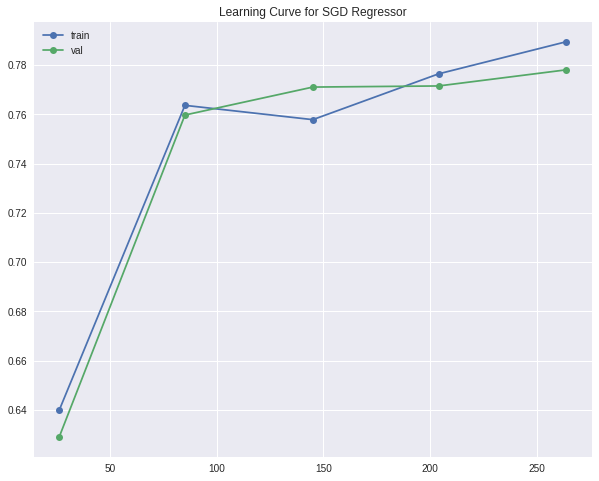

In [39]:
# import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
# plot number of samples vs. mean train scores
ax.plot(train_sizes_abs, np.mean(train_scores, axis=1), label='train',
       marker='o')

# plot number of samples vs. mean val scores
ax.plot(train_sizes_abs, np.mean(val_scores, axis=1), label='val',
       marker='o')

ax.legend()
ax.set_title('Learning Curve for SGD Regressor')
plt.show()

In [40]:
# Prediction (e.g. use model for deployment)
test_input = X_test[:2] # first two values

# pre-process by scaling input
test_input_scaled = X_scaler.transform(test_input)

# predict
pred_scaled = model.predict(test_input_scaled)

# post process by unscaling result from model
pred = y_scaler.inverse_transform(pred_scaled.reshape(-1, 1))
print(pred)

[[26.68637799]
 [27.02802814]]


In [41]:
X_test[:2] 

,cylinders,displacement,horsepower,weight,acceleration,model_year
79,4,96.0,69.0,2189.0,18.0,72
276,4,121.0,115.0,2795.0,15.7,78


In [42]:
y_test[:2]

79     26.0
276    21.6
Name: mpg, dtype: float64